In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

In [2]:
waste_day=pd.read_csv("C:/Users/user/Desktop/work/waste/0_1_waste_01_21.csv", encoding='cp949')
waste_day.head()

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전체,261032,277533,303029,311666,299023,328954,346669,368891,366921,...,394496,393116,401658,418214,429128,429531,446102,497238,534055,540780
1,생활계폐기물,48499,49902,50737,50007,48398,48844,50346,52072,50906,...,48990,48728,49915,51247,53772,53490,56035,57961,61597,62178
2,사업장배출시설계폐기물및건설폐기물,204428,219646,244310,253507,241991,270084,286812,307225,306955,...,333019,331981,338571,353565,361573,361136,374678,423721,457134,462221
3,지정폐기물,8105,7985,7982,8152,8634,10026,9511,9594,9060,...,12487,12407,13172,13402,13783,14905,15389,15556,15324,16381


In [3]:
waste_day=waste_day.transpose()
waste_day.head()

,0,1,2,3
Unnamed: 0,전체,생활계폐기물,사업장배출시설계폐기물및건설폐기물,지정폐기물
2001,261032,48499,204428,8105
2002,277533,49902,219646,7985
2003,303029,50737,244310,7982
2004,311666,50007,253507,8152


In [4]:
waste_day.rename(columns=waste_day.iloc[0],inplace=True)
waste_day=waste_day.drop(waste_day.index[0])
waste_day.head()

,전체,생활계폐기물,사업장배출시설계폐기물및건설폐기물,지정폐기물
2001,261032,48499,204428,8105
2002,277533,49902,219646,7985
2003,303029,50737,244310,7982
2004,311666,50007,253507,8152
2005,299023,48398,241991,8634


In [5]:
waste_day[['전체','생활계폐기물','사업장배출시설계폐기물및건설폐기물','지정폐기물']]=waste_day[['전체','생활계폐기물','사업장배출시설계폐기물및건설폐기물','지정폐기물']].astype(float)

In [6]:
waste_day=waste_day.reset_index()
waste_day.head()

,index,전체,생활계폐기물,사업장배출시설계폐기물및건설폐기물,지정폐기물
0,2001,261032.0,48499.0,204428.0,8105.0
1,2002,277533.0,49902.0,219646.0,7985.0
2,2003,303029.0,50737.0,244310.0,7982.0
3,2004,311666.0,50007.0,253507.0,8152.0
4,2005,299023.0,48398.0,241991.0,8634.0


In [7]:
waste_day=waste_day.rename(columns={'index':'년도','사업장배출시설계폐기물및건설폐기물':'사업장_건설폐기물','지정폐기물발생량':'지정폐기물'})
waste_day.tail()

,년도,전체,생활계폐기물,사업장_건설폐기물,지정폐기물
16,2017,429531.0,53490.0,361136.0,14905.0
17,2018,446102.0,56035.0,374678.0,15389.0
18,2019,497238.0,57961.0,423721.0,15556.0
19,2020,534055.0,61597.0,457134.0,15324.0
20,2021,540780.0,62178.0,462221.0,16381.0


In [8]:
waste_day['total_pct']=waste_day['전체'].pct_change()*100
waste_day['domestic_pct']=waste_day['생활계폐기물'].pct_change()*100
waste_day['biz_pct']=waste_day['사업장_건설폐기물'].pct_change()*100
waste_day['designated_pct']=waste_day['지정폐기물'].pct_change()*100
waste_day

,년도,전체,생활계폐기물,사업장_건설폐기물,지정폐기물,total_pct,domestic_pct,biz_pct,designated_pct
0,2001,261032.0,48499.0,204428.0,8105.0,NaN,NaN,NaN,NaN
1,2002,277533.0,49902.0,219646.0,7985.0,6.321447,2.892843,7.444186,-1.480568
2,2003,303029.0,50737.0,244310.0,7982.0,9.186655,1.673280,11.228978,-0.037570
3,2004,311666.0,50007.0,253507.0,8152.0,2.850222,-1.438792,3.764480,2.129792
4,2005,299023.0,48398.0,241991.0,8634.0,-4.056586,-3.217550,-4.542675,5.912659
5,2006,328954.0,48844.0,270084.0,10026.0,10.009598,0.921526,11.609109,16.122307
6,2007,346669.0,50346.0,286812.0,9511.0,5.385251,3.075096,6.193629,-5.136645
7,2008,368891.0,52072.0,307225.0,9594.0,6.410149,3.428276,7.117206,0.872674
8,2009,366921.0,50906.0,306955.0,9060.0,-0.534033,-2.239207,-0.087883,-5.565979
9,2010,374642.0,49159.0,315995.0,9488.0,2.104268,-3.431816,2.945057,4.724062


In [9]:
waste_day['전체'].max()

540780.0

In [10]:
#한글깨짐

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")

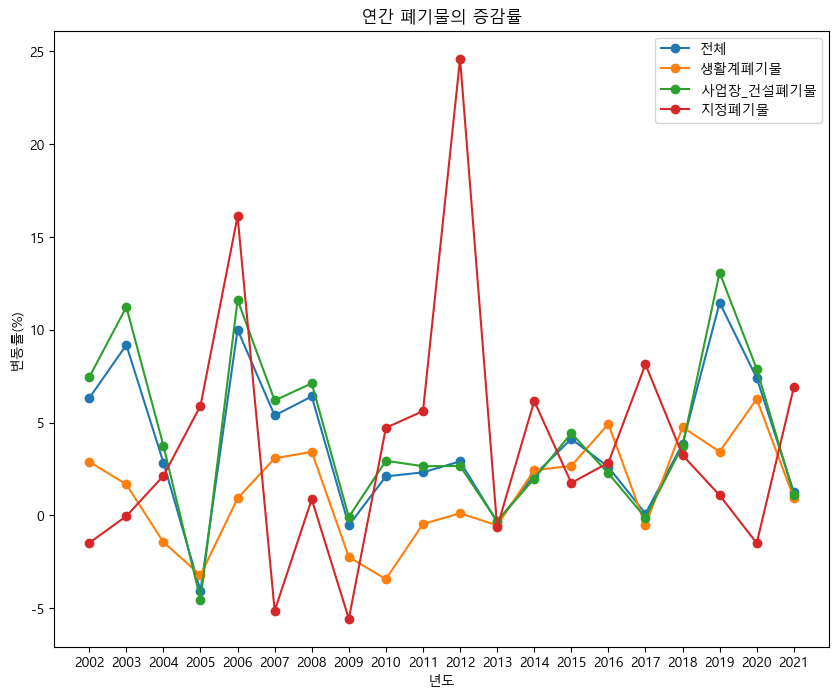

In [11]:
plt.figure(figsize=(10, 8))


plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['total_pct'], marker='o')
plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['domestic_pct'], marker='o')
plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['biz_pct'], marker='o')
plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['designated_pct'], marker='o')
plt.legend(['전체', '생활계폐기물', '사업장_건설폐기물','지정폐기물'])
plt.xlabel('년도')
plt.ylabel('변동률(%)')
plt.title('연간 폐기물의 증감률')
plt.grid(False)
plt.show()

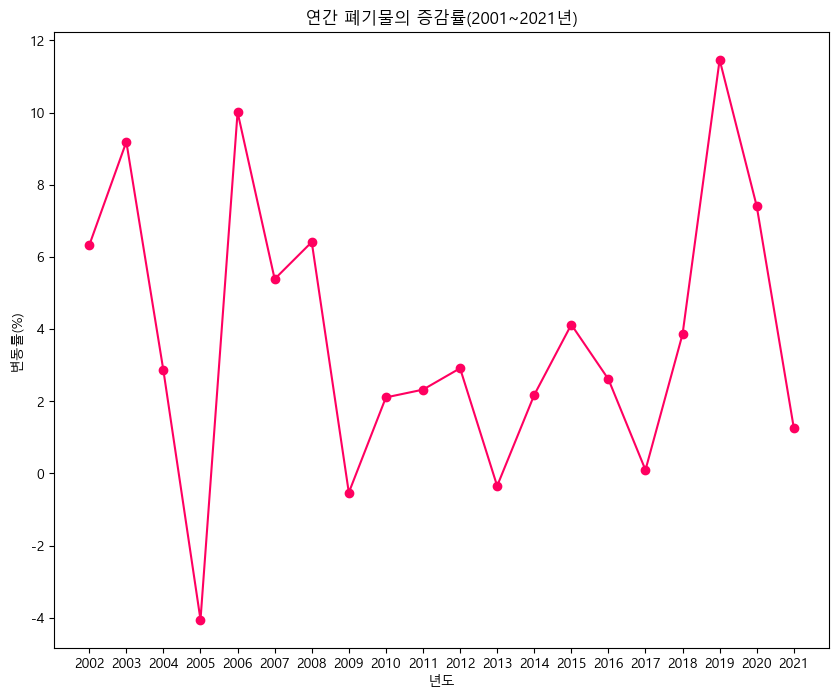

In [12]:
plt.figure(figsize=(10, 8))


plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['total_pct'], marker='o', color='#FF0060')

plt.xlabel('년도')
plt.ylabel('변동률(%)')
plt.title('연간 폐기물의 증감률(2001~2021년)')
plt.grid(False)
plt.show()

In [13]:
# 총인구 기준
population=pd.read_csv("C:/Users/user/Desktop/work/waste/8_population_01_21.csv", encoding='cp949')
population.head()

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,총인구,47370164.00,47644736.00,47892330.00,48082519.0,48184561.00,48438292.00,48683638.00,49054708.00,49307835.00,...,50199853.00,50428893.00,50746659.00,51014947.00,51217803.0,51361911.00,51585058.00,51764822.00,51836239.00,51744876.00
1,인구성장률,0.77,0.58,0.52,0.4,0.21,0.53,0.51,0.76,0.51,...,0.53,0.46,0.63,0.53,0.4,0.28,0.43,0.35,0.14,-0.18
2,자연증가,6.60,5.20,5.10,4.8,4.00,4.20,5.10,4.40,4.00,...,4.30,3.40,3.30,3.20,2.5,1.40,0.50,0.10,-0.60,-1.10


In [14]:
population=population.transpose()

In [15]:
population.rename(columns=population.iloc[0],inplace=True)
population=population.drop(population.index[0])

In [16]:
population[['총인구','인구성장률','자연증가']]=population[['총인구','인구성장률','자연증가']].astype(float)
population.head()

,총인구,인구성장률,자연증가
2001,47370164.0,0.77,6.6
2002,47644736.0,0.58,5.2
2003,47892330.0,0.52,5.1
2004,48082519.0,0.40,4.8
2005,48184561.0,0.21,4.0


In [17]:
population=population.reset_index()

In [18]:
population=population.rename(columns={'index':'년도'})

In [19]:
waste_day=pd.merge(waste_day, population, how='left', on='년도')
waste_day.head()

,년도,전체,생활계폐기물,사업장_건설폐기물,지정폐기물,total_pct,domestic_pct,biz_pct,designated_pct,총인구,인구성장률,자연증가
0,2001,261032.0,48499.0,204428.0,8105.0,NaN,NaN,NaN,NaN,47370164.0,0.77,6.6
1,2002,277533.0,49902.0,219646.0,7985.0,6.321447,2.892843,7.444186,-1.480568,47644736.0,0.58,5.2
2,2003,303029.0,50737.0,244310.0,7982.0,9.186655,1.673280,11.228978,-0.037570,47892330.0,0.52,5.1
3,2004,311666.0,50007.0,253507.0,8152.0,2.850222,-1.438792,3.764480,2.129792,48082519.0,0.40,4.8
4,2005,299023.0,48398.0,241991.0,8634.0,-4.056586,-3.217550,-4.542675,5.912659,48184561.0,0.21,4.0


In [20]:
#폐기물 배출량과 총인구의 상관계수
waste_day[['전체','총인구']].corr()

,전체,총인구
전체,1.000000,0.948203
총인구,0.948203,1.000000


In [21]:
import scipy.stats as ss

In [22]:
#폐기물 배출량과 총인구의 유의확률.
#유의확률이 0.05 미만이므로 두 변수의 상관관계가 통계적으로 유의함
ss.pearsonr(waste_day['전체'], waste_day['총인구'])

PearsonRResult(statistic=0.9482028903144749, pvalue=6.532561470417861e-11)

In [23]:
growth=pd.read_csv("waste/12_economic_growth_rate_01_21.csv", encoding='cp949')
growth.head()

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,경제성장률,4.9,7.7,3.1,5.2,4.3,5.3,5.8,3,0.8,...,2.4,3.2,3.2,2.8,2.9,3.2,2.9,2.2,-0.7,4.3


In [24]:
growth=growth.transpose()
growth.head()

,0
Unnamed: 0,경제성장률
2001,4.9
2002,7.7
2003,3.1
2004,5.2


In [25]:
growth=growth.iloc[1:]
growth.head()

,0
2001,4.9
2002,7.7
2003,3.1
2004,5.2
2005,4.3


In [26]:
growth=growth.rename(columns={0:'경제성장률'})

In [27]:
growth.head()

,경제성장률
2001,4.9
2002,7.7
2003,3.1
2004,5.2
2005,4.3


In [28]:
growth=growth.reset_index(drop=False)


In [29]:
growth=growth.rename(columns={'index':'년도'})
growth.head()

,년도,경제성장률
0,2001,4.9
1,2002,7.7
2,2003,3.1
3,2004,5.2
4,2005,4.3


In [30]:
waste_day=pd.merge(waste_day, growth, how='left', on='년도')
waste_day.head()

,년도,전체,생활계폐기물,사업장_건설폐기물,지정폐기물,total_pct,domestic_pct,biz_pct,designated_pct,총인구,인구성장률,자연증가,경제성장률
0,2001,261032.0,48499.0,204428.0,8105.0,NaN,NaN,NaN,NaN,47370164.0,0.77,6.6,4.9
1,2002,277533.0,49902.0,219646.0,7985.0,6.321447,2.892843,7.444186,-1.480568,47644736.0,0.58,5.2,7.7
2,2003,303029.0,50737.0,244310.0,7982.0,9.186655,1.673280,11.228978,-0.037570,47892330.0,0.52,5.1,3.1
3,2004,311666.0,50007.0,253507.0,8152.0,2.850222,-1.438792,3.764480,2.129792,48082519.0,0.40,4.8,5.2
4,2005,299023.0,48398.0,241991.0,8634.0,-4.056586,-3.217550,-4.542675,5.912659,48184561.0,0.21,4.0,4.3


In [31]:
#폐기물 배출량과 경제성장률의 유의확률.
#유의확률이 0.05 미만이므로 두 변수의 상관관계가 통계적으로 유의함
ss.pearsonr(waste_day['전체'], waste_day['경제성장률'])

PearsonRResult(statistic=-0.5839744028050158, pvalue=0.005443565508519394)

In [32]:
#한글깨짐

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")

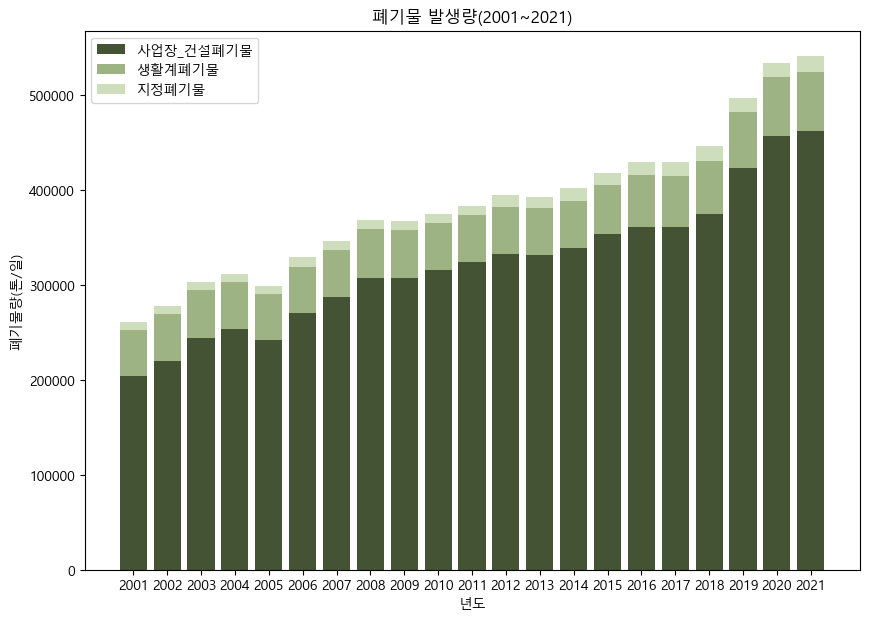

In [33]:
## 폐기물 종류별 연간 폐기물량

plt.figure(figsize=(10, 7))
plt.bar(waste_day['년도'],waste_day['사업장_건설폐기물'],label='사업장_건설폐기물', color="#435334")
plt.bar(waste_day['년도'],waste_day['생활계폐기물'], bottom=waste_day['사업장_건설폐기물'], label='생활계폐기물', color="#9EB384")
plt.bar(waste_day['년도'],waste_day['지정폐기물'], bottom=waste_day['생활계폐기물']+waste_day['사업장_건설폐기물'], label='지정폐기물', color="#CEDEBD")
plt.xlabel('년도')
plt.ylabel('폐기물량(톤/일)')
plt.legend()
plt.title('폐기물 발생량(2001~2021)')
plt.show()

In [34]:
waste_day.iloc[20, 2:]

생활계폐기물               62178.0
사업장_건설폐기물           462221.0
지정폐기물                16381.0
total_pct           1.259234
domestic_pct        0.943228
biz_pct             1.112803
designated_pct      6.897677
총인구               51744876.0
인구성장률                  -0.18
자연증가                    -1.1
경제성장률                    4.3
Name: 20, dtype: object

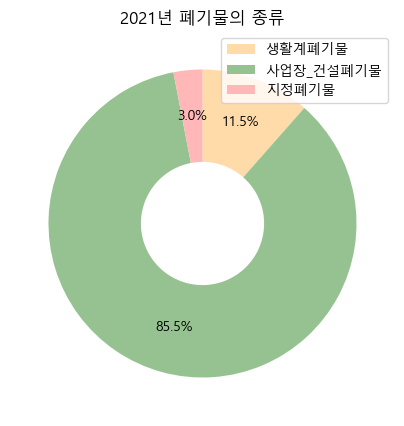

In [35]:
## 2021년 폐기물의 종류

labels = ['생활계폐기물','사업장_건설폐기물','지정폐기물'] ## 라벨
waste_2021 = waste_day.iloc[20, 2:5].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(waste_2021, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#FFDBAA','#96C291','#FFB7B7']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 폐기물의 종류")

plt.show()

In [36]:
disposal=pd.read_csv("C:/Users/user/Desktop/work/waste/0_2_waste_disposal_01_21.csv", encoding='cp949')
disposal.tail()

,년도,발생및처리(총계),발생_생활계폐기물,생활계폐기물_1인당발생량(kg/일),발생_사업장배출시설계폐기물,건설폐기물,처리_매립,처리_소각,처리_재활용,처리_기타
16,2017,414626,53490,1.01,164874,196262,32269,24038,358271,48
17,2018,430713,56035,1.06,167727,206951,31533,24132,375006,42
18,2019,481682,57961,1.09,202619,221102,27679,23723,420626,9654
19,2020,518731,61597,1.16,220951,236183,24691,25649,456800,11591
20,2021,524399,62178,1.18,232603,229618,26235,24614,459481,14070


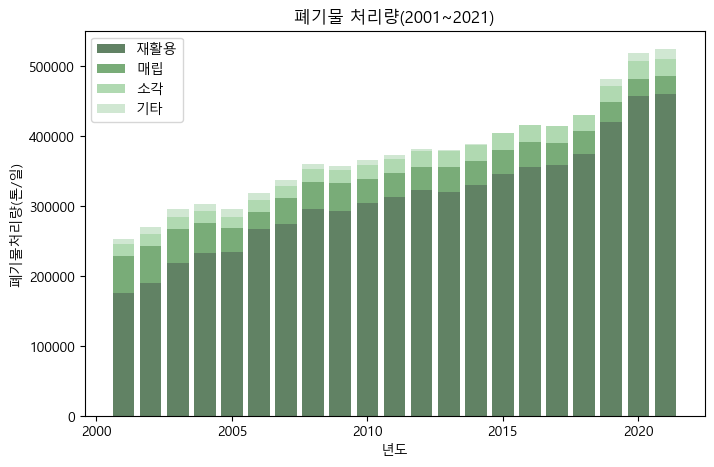

In [37]:
# 폐기물 발생량 및 처리현황(2001~2021년)

plt.figure(figsize=(8, 5))
plt.bar(disposal['년도'],disposal['처리_재활용'],label='재활용', color="#618264")
plt.bar(disposal['년도'],disposal['처리_매립'], bottom=disposal['처리_재활용'], label='매립', color="#79AC78")
plt.bar(disposal['년도'],disposal['처리_소각'], bottom=disposal['처리_매립']+disposal['처리_재활용'], label='소각', color="#B0D9B1")
plt.bar(disposal['년도'],disposal['처리_기타'], bottom=disposal['처리_소각']+disposal['처리_매립']+disposal['처리_재활용'], label='기타', color="#D0E7D2")
plt.xlabel('년도')
plt.ylabel('폐기물처리량(톤/일)')
plt.legend()
plt.title('폐기물 처리량(2001~2021)')
plt.show()

In [38]:
disposal['년도']=disposal['년도'].astype(object)

In [39]:
disposal.iloc[0, 6:].to_list

<bound method IndexOpsMixin.tolist of 처리_매립      52436
처리_소각      16876
처리_재활용    175802
처리_기타       7813
Name: 0, dtype: object>

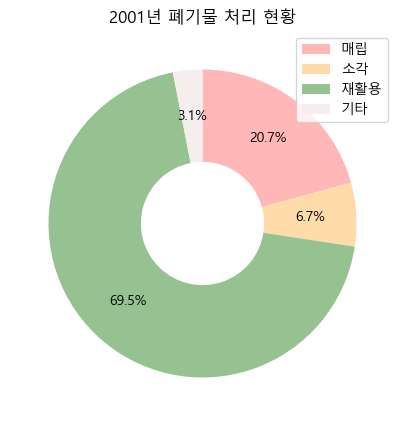

In [40]:
## 2001년 폐기물의 처리 현황(종합)

labels = ['매립','소각','재활용','기타'] ## 라벨
disposal_2001 = disposal.iloc[0, 6:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(disposal_2001, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#FFB7B7','#FFDBAA','#96C291','#F4EEEE']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2001년 폐기물 처리 현황")

plt.show()

In [41]:
disposal.iloc[20, 6:]
#disposal.iloc[20, 6:].to_list()

처리_매립      26235
처리_소각      24614
처리_재활용    459481
처리_기타      14070
Name: 20, dtype: object

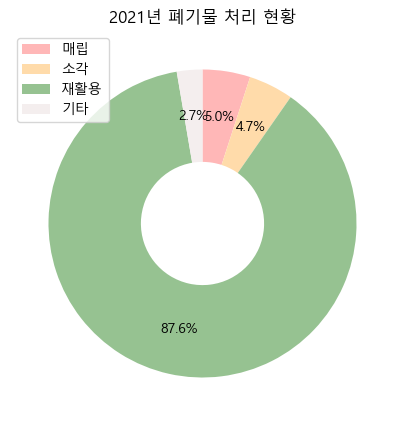

In [42]:
## 2021년 폐기물의 처리 현황(종합)

labels = ['매립','소각','재활용','기타'] ## 라벨
disposal_2021 = disposal.iloc[20, 6:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(disposal_2021, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#FFB7B7','#FFDBAA','#96C291','#F4EEEE']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 폐기물 처리 현황")

plt.show()

In [43]:
disposal_type=pd.read_csv("C:/Users/user/Desktop/work/waste/16_type_of_disposal_21.csv", encoding='cp949')
disposal_type

,폐기물 종류,단위,2021발생량,재활용,소각,매립,기타
0,생활계폐기물,톤/년,22695025.3,12865308.8,5640246.7,2918241.7,1271228.1
1,사업장_건설폐기물,톤/년,111002964.9,105440876.1,1011981.1,3483526.5,1066581.2
2,사업장지정폐기물,톤/년,5761299.7,3903524.4,593314.3,881787.6,382673.4


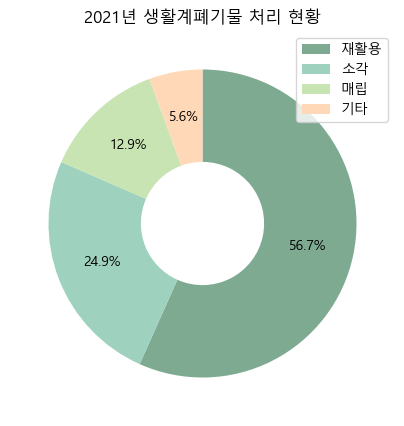

In [44]:
## 2021년 생활계폐기물 처리 현황
labels = ['재활용','소각','매립','기타'] ## 라벨
type1 = disposal_type.iloc[0, 3:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(type1, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#7EAA92','#9ED2BE','#C8E4B2','#FFD9B7']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 생활계폐기물 처리 현황")

plt.show()

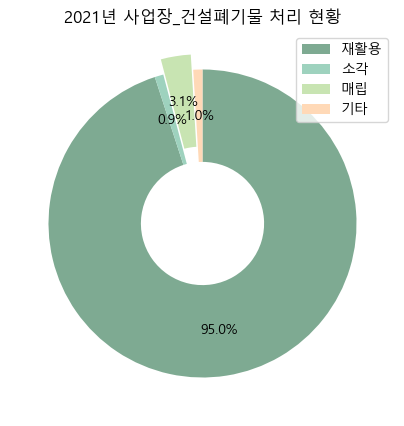

In [45]:
## 2021년 사업장_건설폐기물 처리 현황

labels = ['재활용','소각','매립','기타'] ## 라벨
type2 = disposal_type.iloc[1, 3:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

explode = [0,0,0.1,0]
pie = ax.pie(type2, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       explode=explode,
       colors=['#7EAA92','#9ED2BE','#C8E4B2','#FFD9B7']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 사업장_건설폐기물 처리 현황")

plt.show()

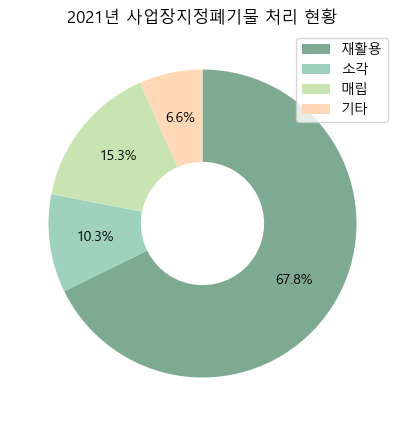

In [46]:
## 2021년 사업자지정폐기물 처리 현황

labels = ['재활용','소각','매립','기타'] ## 라벨
type3 = disposal_type.iloc[2, 3:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(type3, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#7EAA92','#9ED2BE','#C8E4B2','#FFD9B7']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 사업장지정폐기물 처리 현황")

plt.show()

In [47]:
# 2021년 지역별 생활계폐기물 발생량 및 처리 현황
area_2021=pd.read_csv("C:/Users/user/Desktop/work/waste/17_domestic_by_region_21.csv", encoding='cp949')
area_2021.head()

,시도,시군구,2021발생량(톤/년),재활용,소각,매립,기타
0,서울,종로구,11996.4,0.0,9608.8,2387.6,0.0
1,서울,종로구,7027.8,0.0,5629.1,1398.7,0.0
2,서울,종로구,220.6,0.0,176.7,43.9,0.0
3,서울,종로구,749.7,0.0,600.5,149.2,0.0
4,서울,종로구,920.2,0.0,737.1,183.1,0.0


In [48]:
recycle=area_2021.groupby('시도').agg(waste_sum=('2021발생량(톤/년)','sum'),recycle_sum=('재활용','sum'))

In [49]:
recycle_area=recycle.assign(recycle_rate=recycle['recycle_sum']/recycle['waste_sum']*100)
recycle_area.head()

,waste_sum,recycle_sum,recycle_rate
시도,,,
강원,830246.9,427280.0,51.464209
경기,5472310.9,3355972.7,61.326426
경남,1709497.3,830282.6,48.568816
경북,1434006.6,701591.5,48.925263
광주,567040.6,354101.0,62.447204


In [50]:
recycle_area=recycle_area.sort_values('waste_sum', ascending=False)
recycle_area.head()

,waste_sum,recycle_sum,recycle_rate
시도,,,
경기,5472310.9,3355972.7,61.326426
서울,3961311.4,2220840.9,56.063275
경남,1709497.3,830282.6,48.568816
경북,1434006.6,701591.5,48.925263
인천,1417485.1,774379.1,54.630493


In [51]:
pop_2021=pd.read_csv("waste/18_district_population_21.csv", encoding='cp949')
pop_2021.head()

,시도,시군구,면적(㎢),인구(명),동(읍·면)수 (개소),세대수(가구)
0,서울,종로구,23.91,153789,17,73494
1,서울,중구,9.96,131787,15,63519
2,서울,용산구,21.86,237285,16,111036
3,서울,성동구,16.86,292672,17,134233
4,서울,광진구,17.06,352627,15,167949


In [52]:
pop_area=pop_2021.groupby('시도').agg(population=('인구(명)','sum'),household=('세대수(가구)','sum'))
pop_area.head()

,population,household
시도,,
강원,1555057,745823
경기,13925862,5841995
경남,3374516,1504236
경북,2654158,1263487
광주,1462545,645712


In [53]:
area_all=pd.merge(recycle_area,pop_area, how='left',on='시도')
area_all=area_all.reset_index()
area_all.head()

,시도,waste_sum,recycle_sum,recycle_rate,population,household
0,경기,5472310.9,3355972.7,61.326426,13925862,5841995
1,서울,3961311.4,2220840.9,56.063275,9736027,4426007
2,경남,1709497.3,830282.6,48.568816,3374516,1504236
3,경북,1434006.6,701591.5,48.925263,2654158,1263487
4,인천,1417485.1,774379.1,54.630493,3014347,1298403


In [54]:
area_all=area_all.sort_values('waste_sum', ascending=False)

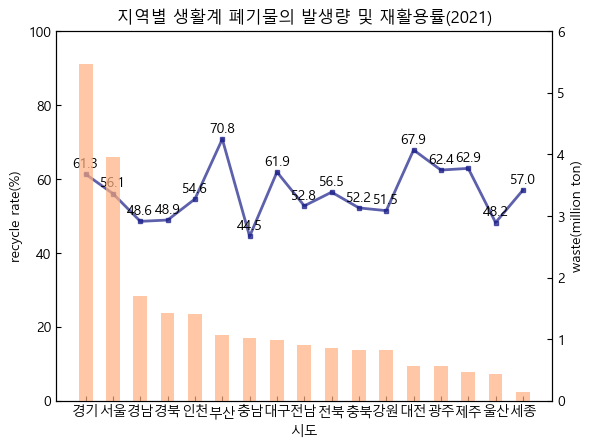

In [55]:
## 2021년 지역별 생활계 폐기물 발생량과 재활용 처리 비율
# 데이터 준비
x = area_all['시도']
y1 = area_all['recycle_rate']
y2 = area_all['waste_sum']/1000000

# 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='#191D88', markersize=3, linewidth=2, alpha=0.7, label='rate')
ax1.set_ylim([0, 100])
ax1.set_xlabel('시도')
ax1.set_ylabel('recycle rate(%)')
ax1.tick_params(axis='both', direction='in')

for i in range(len(x)):
    height = y1[i]
    plt.text(x[i], height + 1, '%.1f' %height, ha='center', va='bottom', size = 10)


ax2 = ax1.twinx()
ax2.bar(x, y2, color='#FFB07F', label='waste', alpha=0.7, width=0.5)
ax2.set_ylim(0, 6)
ax2.set_ylabel('waste(million ton)')
ax2.tick_params(axis='y', direction='in')
plt.title('지역별 생활계 폐기물의 발생량 및 재활용률(2021)')

plt.show()

In [56]:
area_all=area_all.sort_values('population', ascending=False)

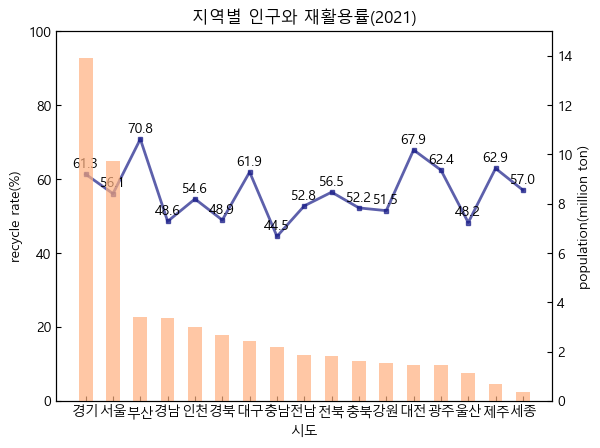

In [57]:
## 2021년 지역별 인구수와 생활계 폐기물의 재활용 처리 비율

# 데이터 준비
x = area_all['시도']
y1 = area_all['recycle_rate']
y2 = area_all['population']/1000000

# 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='#191D88', markersize=3, linewidth=2, alpha=0.7, label='rate')
ax1.set_ylim([0, 100])
ax1.set_xlabel('시도')
ax1.set_ylabel('recycle rate(%)')
ax1.tick_params(axis='both', direction='in')

for i in range(len(x)):
    height = y1[i]
    plt.text(x[i], height + 1, '%.1f' %height, ha='center', va='bottom', size = 10)


ax2 = ax1.twinx()
ax2.bar(x, y2, color='#FFB07F', label='population', alpha=0.7, width=0.5)
ax2.set_ylim(0, 15)
ax2.set_ylabel('population(million ton)')
ax2.tick_params(axis='y', direction='in')
plt.title('지역별 인구와 재활용률(2021)')

plt.show()

In [58]:
area_all['waste_sum'].sum()

22695025.3

In [59]:
area_all=area_all.assign(waste_per_day=area_all['waste_sum']/365)
area_all

,시도,waste_sum,recycle_sum,recycle_rate,population,household,waste_per_day
0,경기,5472310.9,3355972.7,61.326426,13925862,5841995,14992.632603
1,서울,3961311.4,2220840.9,56.063275,9736027,4426007,10852.907945
5,부산,1072610.7,759686.5,70.825930,3389800,1544663,2938.659452
2,경남,1709497.3,830282.6,48.568816,3374516,1504236,4683.554247
4,인천,1417485.1,774379.1,54.630493,3014347,1298403,3883.520822
3,경북,1434006.6,701591.5,48.925263,2654158,1263487,3928.785205
7,대구,982873.8,608519.1,61.912231,2436012,1077151,2692.804932
6,충남,1024489.0,455967.0,44.506774,2178765,999872,2806.819178
8,전남,907241.6,478673.5,52.761414,1857404,897210,2485.593425
9,전북,858871.0,484991.1,56.468445,1813740,847073,2353.071233


In [60]:
# 지역별 1인당 일일 생활계폐기물 발생량 
area_all=area_all.assign(waste_head=area_all['waste_per_day']/area_all['population']*1000)
area_all.head()

,시도,waste_sum,recycle_sum,recycle_rate,population,household,waste_per_day,waste_head
0,경기,5472310.9,3355972.7,61.326426,13925862,5841995,14992.632603,1.076604
1,서울,3961311.4,2220840.9,56.063275,9736027,4426007,10852.907945,1.114716
5,부산,1072610.7,759686.5,70.825930,3389800,1544663,2938.659452,0.866912
2,경남,1709497.3,830282.6,48.568816,3374516,1504236,4683.554247,1.387919
4,인천,1417485.1,774379.1,54.630493,3014347,1298403,3883.520822,1.288346


In [61]:
# 생활계폐기물 /생활폐기물관리지역 인구   => 1인당 1일 폐기물 배출량 1.18kg
area_all['waste_per_day'].sum()/(area_all['population'].sum()*1000)

1.1795399154259025e-06

In [62]:
area_all=area_all.sort_values('waste_sum', ascending=False)

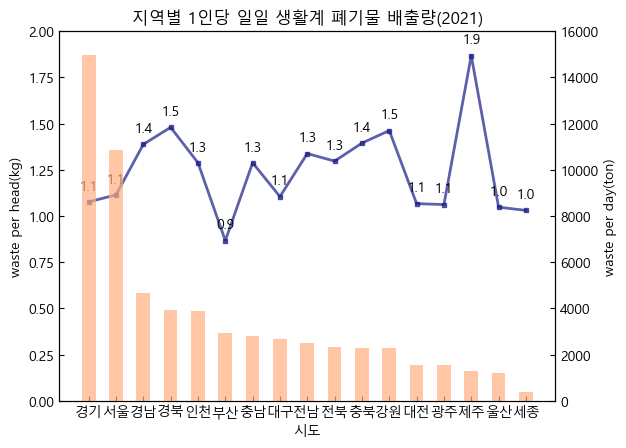

In [63]:
## 2021년 지역별 1인당 일일 생활계 폐기물 배출량

# 데이터 준비
x = area_all['시도']
y1 = area_all['waste_head']
y2 = area_all['waste_per_day']

# 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='#191D88', markersize=3, linewidth=2, alpha=0.7, label='rate')
ax1.set_ylim([0, 2])
ax1.set_xlabel('시도')
ax1.set_ylabel('waste per head(kg)')
ax1.tick_params(axis='both', direction='in')

for i in range(len(x)):
    height = y1[i]
    plt.text(x[i], height + 0.05, '%.1f' %height, ha='center', va='bottom', size = 10)


ax2 = ax1.twinx()
ax2.bar(x, y2, color='#FFB07F', label='waste', alpha=0.7, width=0.5)
ax2.set_ylim(0, 16000)
ax2.set_ylabel('waste per day(ton)')
ax2.tick_params(axis='y', direction='in')
plt.title('지역별 1인당 일일 생활계 폐기물 배출량(2021)')

plt.show()

In [64]:
# 2001~2021년 OECD 주요국의 1인당 생활폐기물발생량

waste_country=pd.read_csv("C:/Users/user/Desktop/work/waste/19_waste_per_head_OECD_02_18.csv", encoding='cp949')
waste_country.head()

,국가,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,폴란드,275,260,256,319,321,322,320,316,312,315,314,293,268,282,303,312,325
1,일본,425,425,418,413,407,397,376,361,354,355,355,352,348,346,340,339,338
2,체코,279,280,278,289,296,293,305,315,317,320,308,307,310,317,339,489,494
3,한국,382,387,380,367,368,377,387,377,362,358,356,353,359,367,383,380,396
4,튀르키예,470,465,440,458,434,433,400,419,407,416,410,406,405,400,426,425,424


In [65]:
country_2018=waste_country[['국가','2018']].sort_values('2018')
country_2018

,국가,2018
0,폴란드,325
1,일본,338
3,한국,396
4,튀르키예,424
6,영국,463
5,스페인,476
2,체코,494
8,이탈리아,504
11,네덜란드,511
7,그리스,515


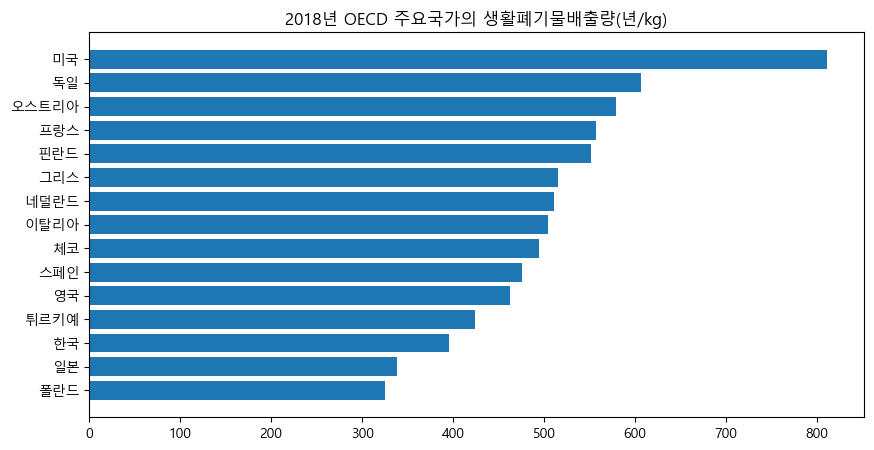

In [66]:
plt.figure(figsize=(10, 5))

y = range(0,15)
country = country_2018['국가']
values = country_2018['2018']

plt.barh(y, values)
plt.yticks(y, country)
plt.title('2018년 OECD 주요국가의 생활폐기물배출량(년/kg)')

plt.show()

In [67]:
# 생활계 재활용폐기물의 종류

plastic_21=pd.read_csv("C:/Users/user/Desktop/work/waste/5_domestic_21.csv", encoding='cp949')
plastic_21.head()

,년도,시도,시군구,폐기물_종류,폐기물_종류.1,폐기물_종류.2,년도_발생량,총계_재활용,총계_소각,총계_매립,...,공공처리_매립,공공처리_기타,자가처리_재활용,자가처리_소각,자가처리_매립,자가처리_기타,위탁처리_재활용,위탁처리_소각,위탁처리_매립,위탁처리_기타
0,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐지류,11996.4,0.0,9608.8,2387.6,...,2387.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐합성수지류,7027.8,0.0,5629.1,1398.7,...,1398.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐고무류,220.6,0.0,176.7,43.9,...,43.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐섬유류,749.7,0.0,600.5,149.2,...,149.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,서울,종로구,종량제방식 등 혼합배출,가연성,음식물류 폐기물,920.2,0.0,737.1,183.1,...,183.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
plastic_21[plastic_21['시도']=='제주']

,년도,시도,시군구,폐기물_종류,폐기물_종류.1,폐기물_종류.2,년도_발생량,총계_재활용,총계_소각,총계_매립,...,공공처리_매립,공공처리_기타,자가처리_재활용,자가처리_소각,자가처리_매립,자가처리_기타,위탁처리_재활용,위탁처리_소각,위탁처리_매립,위탁처리_기타
7770,2021,제주,제주시,종량제방식 등 혼합배출,가연성,폐지류,22343.3,0.0,22343.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7771,2021,제주,제주시,종량제방식 등 혼합배출,가연성,폐합성수지류,21262.0,0.0,20986.2,275.8,...,275.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,2021,제주,제주시,종량제방식 등 혼합배출,가연성,폐고무류,1019.9,0.0,1019.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,2021,제주,제주시,종량제방식 등 혼합배출,가연성,폐섬유류,8280.4,0.0,8280.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,2021,제주,제주시,종량제방식 등 혼합배출,가연성,음식물류 폐기물,9326.3,0.0,9326.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,2021,제주,서귀포시,재활용 가능자원 분리배출,폐전기전자제품,NaN,973.0,973.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,973.0,0.0,0.0,0.0
7840,2021,제주,서귀포시,재활용 가능자원 분리배출,폐가구류,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841,2021,제주,서귀포시,재활용 가능자원 분리배출,기타,NaN,0.2,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1
7842,2021,제주,서귀포시,재활용 가능자원 분리배출,재활용 잔재물,NaN,2748.0,0.0,1911.0,837.0,...,837.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
pet=plastic_21[plastic_21['폐기물_종류.2']=='PET병']['년도_발생량'].sum()
pet

185718.99999999997

In [70]:
pet

185718.99999999997

In [71]:
pet/plastic_21['년도_발생량'].sum()*100

1.1086831358298288

In [72]:
plastic_21.groupby('폐기물_종류.2').agg(waste_ttl=('년도_발생량','sum'))

,waste_ttl
폐기물_종류.2,
PET병,185719.0
건설폐재류(공사장생활폐기물),195182.5
기타,3925306.3
농약용기류,5194.4
발포수지류,62222.9
비닐류,439615.7
연탄재,39982.8
음식물류 폐기물,523535.9
종이팩,16534.5


In [73]:
plastic_21.groupby(['폐기물_종류','폐기물_종류.1','폐기물_종류.2'])[['년도_발생량','총계_재활용']].sum()

년도_발생량     총계_재활용
폐기물_종류        폐기물_종류.1 폐기물_종류.2                             
재활용 가능자원 분리배출 영농폐기물    농약용기류               5194.4     5194.4
                       폐비닐               202424.1   202424.1
              폐지류      기타               1245134.8  1245134.8
                       종이팩                16534.5    16534.5
              폐합성수지류   PET병              185719.0   185719.0
                       기타                471651.9   471651.9
                       발포수지류              62222.9    62222.9
                       비닐류               439615.7   439615.7
종량제방식 등 혼합배출  가연성      기타               1829653.7   169435.2
                       음식물류 폐기물          523535.9    31254.8
                       폐고무류              107296.2     4914.4
                       폐목재류              446902.0   188547.0
                       폐섬유류              396048.7    42760.3
                       폐지류              1873452.9   135802.5
                       폐합성수지류           1750968.8   240952.3
              건설폐재류    건설폐재류(공사장생활폐기물)   195182.5    23435.0
              불연성      기타                378865.9    16617.1
                       연탄재                39982.8     7295.7
                       폐금속류              178206.8    11129.9
                       폐유리류              239808.8     8984.3
                       폐타일 및 도자기류         46498.7     4371.6
                       폐토사류               76362.8     8156.1

In [74]:
type1=plastic_21.groupby(['폐기물_종류','폐기물_종류.1'])[['년도_발생량','총계_재활용']].sum()
type1

년도_발생량     총계_재활용
폐기물_종류        폐기물_종류.1                       
재활용 가능자원 분리배출 고철류         146660.1   146660.1
              금속캔          92120.9    92120.9
              기타           66060.0    66059.8
              영농폐기물       207618.5   207618.5
              재활용 잔재물     559986.5   355339.7
              조명폐기물         6296.6     6296.6
              폐가구류        111983.7   111983.7
              폐고무류          6282.1     6282.1
              폐섬유류         15655.6    15655.6
              폐식용유          3220.3     3220.3
              폐유리병류       282434.9   282434.9
              폐의류         118386.3   118386.3
              폐전기전자제품      85933.3    85933.3
              폐전지류          4432.8     4432.8
              폐지류        1261669.3  1261669.3
              폐합성수지류     1159209.5  1159209.5
종량제방식 등 혼합배출  가연성        6927858.2   813666.5
              건설폐재류       195182.5    23435.0
              기타(배출불명등)    65039.8     2944.5
              불연성         959725.8    56554.7

In [75]:
type2=type1.iloc[0:16]

In [76]:
type2[['년도_발생량','총계_재활용']].sum()

년도_발생량    4127950.4
총계_재활용    3923303.4
dtype: float64

In [77]:
type2=type2.assign(rate=type1['총계_재활용']/type1['년도_발생량']*100)
type2

년도_발생량     총계_재활용        rate
폐기물_종류        폐기물_종류.1                                  
재활용 가능자원 분리배출 고철류        146660.1   146660.1  100.000000
              금속캔         92120.9    92120.9  100.000000
              기타          66060.0    66059.8   99.999697
              영농폐기물      207618.5   207618.5  100.000000
              재활용 잔재물    559986.5   355339.7   63.455048
              조명폐기물        6296.6     6296.6  100.000000
              폐가구류       111983.7   111983.7  100.000000
              폐고무류         6282.1     6282.1  100.000000
              폐섬유류        15655.6    15655.6  100.000000
              폐식용유         3220.3     3220.3  100.000000
              폐유리병류      282434.9   282434.9  100.000000
              폐의류        118386.3   118386.3  100.000000
              폐전기전자제품     85933.3    85933.3  100.000000
              폐전지류         4432.8     4432.8  100.000000
              폐지류       1261669.3  1261669.3  100.000000
              폐합성수지류    1159209.5  1159209.5  100.000000

In [78]:
type2.sort_values('년도_발생량', ascending=False)

년도_발생량     총계_재활용        rate
폐기물_종류        폐기물_종류.1                                  
재활용 가능자원 분리배출 폐지류       1261669.3  1261669.3  100.000000
              폐합성수지류    1159209.5  1159209.5  100.000000
              재활용 잔재물    559986.5   355339.7   63.455048
              폐유리병류      282434.9   282434.9  100.000000
              영농폐기물      207618.5   207618.5  100.000000
              고철류        146660.1   146660.1  100.000000
              폐의류        118386.3   118386.3  100.000000
              폐가구류       111983.7   111983.7  100.000000
              금속캔         92120.9    92120.9  100.000000
              폐전기전자제품     85933.3    85933.3  100.000000
              기타          66060.0    66059.8   99.999697
              폐섬유류        15655.6    15655.6  100.000000
              조명폐기물        6296.6     6296.6  100.000000
              폐고무류         6282.1     6282.1  100.000000
              폐전지류         4432.8     4432.8  100.000000
              폐식용유         3220.3     3220.3  100.000000

In [79]:
# 멀티인덱스의 상위 레벨 제거하기

type2=type2.droplevel(axis=0,level=0)
type2

,년도_발생량,총계_재활용,rate
폐기물_종류.1,,,
고철류,146660.1,146660.1,100.000000
금속캔,92120.9,92120.9,100.000000
기타,66060.0,66059.8,99.999697
영농폐기물,207618.5,207618.5,100.000000
재활용 잔재물,559986.5,355339.7,63.455048
조명폐기물,6296.6,6296.6,100.000000
폐가구류,111983.7,111983.7,100.000000
폐고무류,6282.1,6282.1,100.000000
폐섬유류,15655.6,15655.6,100.000000


In [80]:
type2=type2.sort_values('년도_발생량')
type2

,년도_발생량,총계_재활용,rate
폐기물_종류.1,,,
폐식용유,3220.3,3220.3,100.000000
폐전지류,4432.8,4432.8,100.000000
폐고무류,6282.1,6282.1,100.000000
조명폐기물,6296.6,6296.6,100.000000
폐섬유류,15655.6,15655.6,100.000000
기타,66060.0,66059.8,99.999697
폐전기전자제품,85933.3,85933.3,100.000000
금속캔,92120.9,92120.9,100.000000
폐가구류,111983.7,111983.7,100.000000


In [81]:
#행인덱스를 가져오기
list(type2.index)

['폐식용유',
 '폐전지류',
 '폐고무류',
 '조명폐기물',
 '폐섬유류',
 '기타',
 '폐전기전자제품',
 '금속캔',
 '폐가구류',
 '폐의류',
 '고철류',
 '영농폐기물',
 '폐유리병류',
 '재활용 잔재물',
 '폐합성수지류',
 '폐지류']

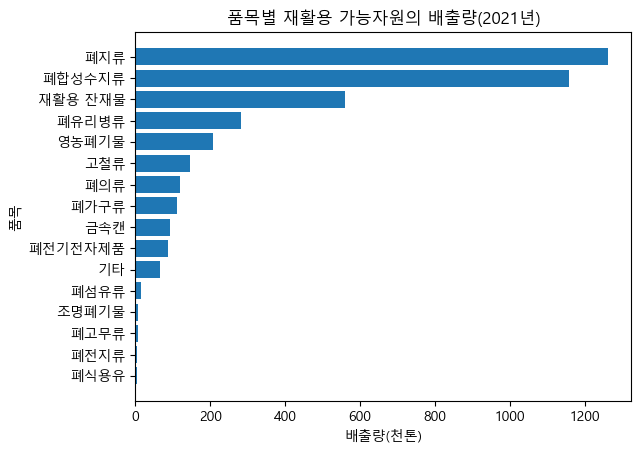

In [82]:
# 품목별 재활용 가능자원의 배출량

import matplotlib.pyplot as plt
import numpy as np

y = np.arange(16)
materials = list(type2.index)
values = type2['년도_발생량']/1000

plt.barh(y, values)
plt.yticks(y, materials)

plt.title('품목별 재활용 가능자원의 배출량(2021년)')
plt.ylabel('품목')
plt.xlabel('배출량(천톤)')

plt.show()

In [83]:
# 지역별 폐합성수지류 배출량

In [84]:
plastic_21.head()

,년도,시도,시군구,폐기물_종류,폐기물_종류.1,폐기물_종류.2,년도_발생량,총계_재활용,총계_소각,총계_매립,...,공공처리_매립,공공처리_기타,자가처리_재활용,자가처리_소각,자가처리_매립,자가처리_기타,위탁처리_재활용,위탁처리_소각,위탁처리_매립,위탁처리_기타
0,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐지류,11996.4,0.0,9608.8,2387.6,...,2387.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐합성수지류,7027.8,0.0,5629.1,1398.7,...,1398.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐고무류,220.6,0.0,176.7,43.9,...,43.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐섬유류,749.7,0.0,600.5,149.2,...,149.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,서울,종로구,종량제방식 등 혼합배출,가연성,음식물류 폐기물,920.2,0.0,737.1,183.1,...,183.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
plastic_21['년도_발생량'].sum()

16751314.600000001

In [86]:
plastic_area=plastic_21[plastic_21['폐기물_종류.2']=='PET병']
plastic_area.head()

,년도,시도,시군구,폐기물_종류,폐기물_종류.1,폐기물_종류.2,년도_발생량,총계_재활용,총계_소각,총계_매립,...,공공처리_매립,공공처리_기타,자가처리_재활용,자가처리_소각,자가처리_매립,자가처리_기타,위탁처리_재활용,위탁처리_소각,위탁처리_매립,위탁처리_기타
21,2021,서울,종로구,재활용 가능자원 분리배출,폐합성수지류,PET병,738.6,738.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,519.3,0.0,0.0,0.0
58,2021,서울,중구,재활용 가능자원 분리배출,폐합성수지류,PET병,712.8,712.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,146.9,0.0,0.0,0.0
95,2021,서울,용산구,재활용 가능자원 분리배출,폐합성수지류,PET병,973.0,973.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,208.2,0.0,0.0,0.0
132,2021,서울,성동구,재활용 가능자원 분리배출,폐합성수지류,PET병,1671.3,1671.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,521.8,0.0,0.0,0.0
169,2021,서울,광진구,재활용 가능자원 분리배출,폐합성수지류,PET병,1315.5,1315.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1315.5,0.0,0.0,0.0


In [87]:
plastic_area[plastic_area['시도']=='제주']

,년도,시도,시군구,폐기물_종류,폐기물_종류.1,폐기물_종류.2,년도_발생량,총계_재활용,총계_소각,총계_매립,...,공공처리_매립,공공처리_기타,자가처리_재활용,자가처리_소각,자가처리_매립,자가처리_기타,위탁처리_재활용,위탁처리_소각,위탁처리_매립,위탁처리_기타
7791,2021,제주,제주시,재활용 가능자원 분리배출,폐합성수지류,PET병,2234.3,2234.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.3,0.0,0.0,0.0
7828,2021,제주,서귀포시,재활용 가능자원 분리배출,폐합성수지류,PET병,2041.0,2041.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
plastic_area=plastic_area.groupby('시도')[['년도_발생량','총계_재활용']].sum()
plastic_area=plastic_area.sort_values('년도_발생량')

In [89]:
plastic_area

,년도_발생량,총계_재활용
시도,,
세종,1133.0,1133.0
울산,3253.7,3253.7
제주,4275.3,4275.3
부산,4400.2,4400.2
충남,4814.3,4814.3
대전,4815.4,4815.4
전남,5241.6,5241.6
강원,6181.0,6181.0
충북,6435.7,6435.7


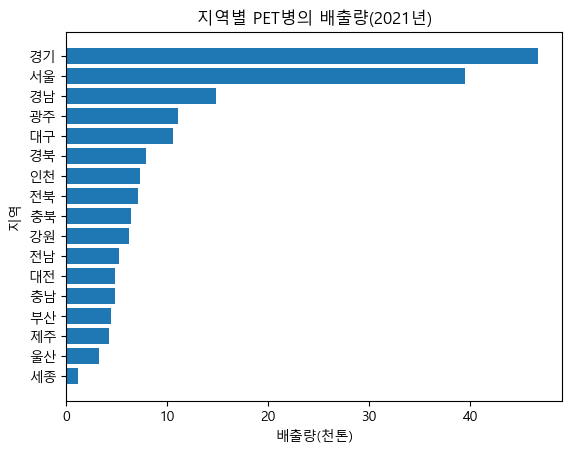

In [90]:
# 지역별 PET병의 배출량

import matplotlib.pyplot as plt
import numpy as np

y = np.arange(17)
area = list(plastic_area.index)
values = plastic_area['년도_발생량']/1000

plt.barh(y, values)
plt.yticks(y, area)

plt.title('지역별 PET병의 배출량(2021년)')
plt.ylabel('지역')
plt.xlabel('배출량(천톤)')

plt.show()

In [91]:
# 관리인력

manpower_21=pd.read_csv("C:/Users/user/Desktop/work/waste/20_input_manpower_equipment_21.csv", encoding='cp949')
manpower_21=manpower_21.loc[1:]
manpower_21

,시도,인명(명),차량(대),손수레(대),중장비(대)
1,서울,6181,2542,731,81
2,부산,2839,1081,446,9
3,대구,2067,781,193,6
4,인천,1966,689,894,35
5,광주,806,277,4,1
6,대전,1133,361,66,1
7,울산,689,463,32,0
8,세종,280,118,0,10
9,경기,8805,3112,869,57
10,충북,1190,457,103,30


In [92]:
# 병합
data21=pd.merge(plastic_area, manpower_21, how='left', on='시도')

In [93]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      17 non-null     object 
 1   년도_발생량  17 non-null     float64
 2   총계_재활용  17 non-null     float64
 3   인명(명)   17 non-null     int64  
 4   차량(대)   17 non-null     int64  
 5   손수레(대)  17 non-null     int64  
 6   중장비(대)  17 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.1+ KB


In [94]:
data21[['총계_재활용','인명(명)']].corr()

,총계_재활용,인명(명)
총계_재활용,1.000000,0.945783
인명(명),0.945783,1.000000


In [95]:
import scipy.stats as ss

In [130]:
ss.pearsonr(data21['총계_재활용'],data21['인명(명)'])

PearsonRResult(statistic=0.9457831767015054, pvalue=1.0048826925696684e-08)